# Importing the required libraries

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import random
from PIL import Image
import shutil

# Displaying all names of fishes categories

In [2]:
dataset_dir = r"C:\Users\vemul\Desktop\Wow _ Project\Data\train"

for image_class in os.listdir(dataset_dir): 
    print(image_class)

Black Sea Sprat
Gilt-Head Bream
Hourse Mackerel
Red Mullet
Red Sea Bream
Sea Bass
Shrimp
Striped Red Mullet
Trout


In [3]:
dir_list = os.listdir(dataset_dir)
print(len(dir_list))

9


# Displaying 5 random images from each class

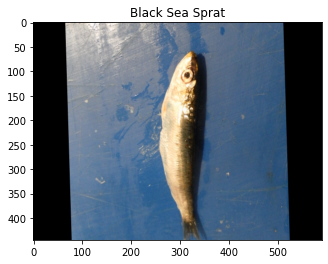

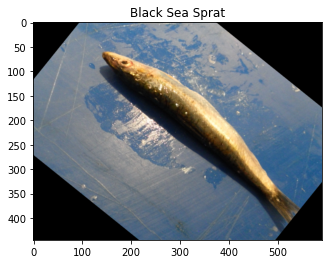

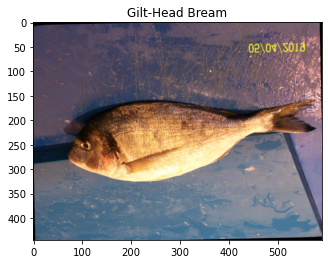

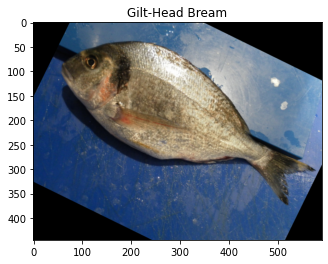

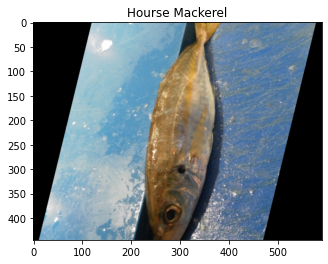

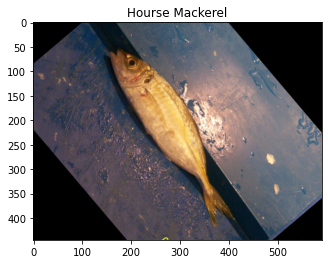

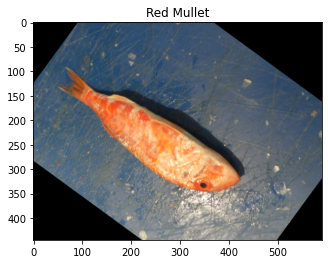

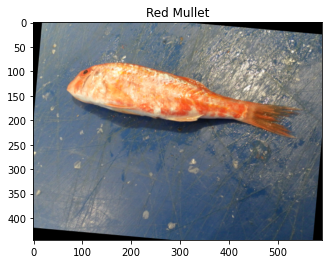

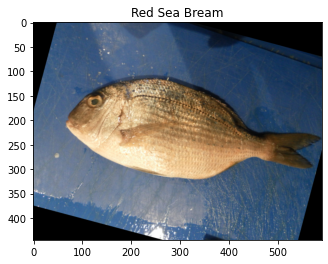

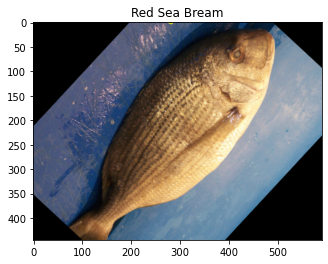

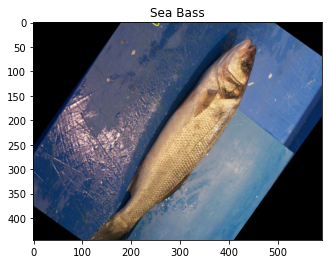

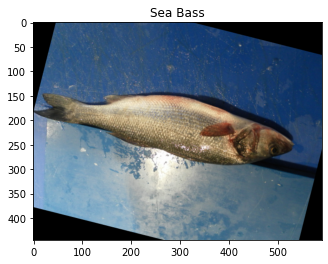

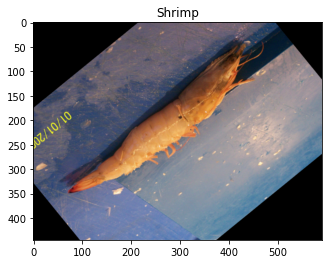

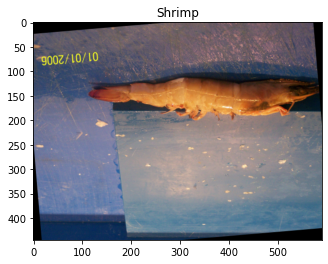

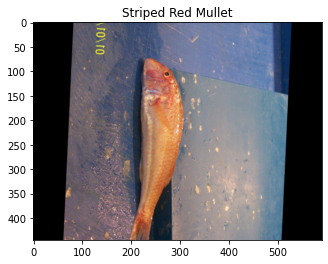

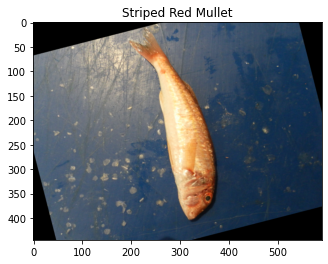

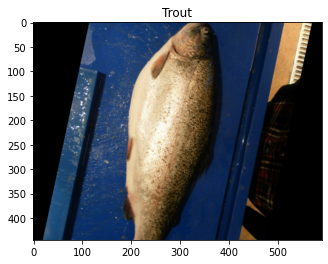

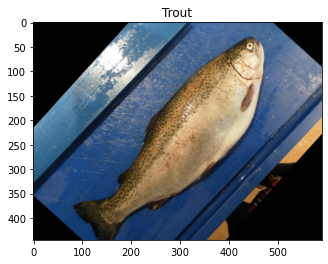

In [4]:
# Path to the dataset directory
dataset_dir = r"C:\Users\vemul\Desktop\Wow _ Project\Data\train"

# Number of images to display per class
num_images_per_class = 2

# Get a list of all class directories in the dataset
class_dirs = os.listdir(dataset_dir)

# Loop over each class directory and display a random sample of images
for class_dir in class_dirs:
    # Get a list of all image files in the class directory
    image_files = os.listdir(os.path.join(dataset_dir, class_dir))

    # Choose a random sample of images from the class
    sample_images = random.sample(image_files, num_images_per_class)

    # Display each image in the sample
    for image_file in sample_images:
        image_path = os.path.join(dataset_dir, class_dir, image_file)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(class_dir)
        plt.show()

# Data Labeling and Data Splitting

In [6]:
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator

# specifying the path to the dataset
data_dir = r"C:\Users\vemul\Desktop\Wow _ Project\Data\train"
new_dir = r"C:\Users\vemul\Desktop\Wow _ Project\Data\valid"
# to create sub-directories with train,test,validation names
train_dir = os.path.join(new_dir, 'train')
test_dir = os.path.join(new_dir, 'test')
val_dir = os.path.join(new_dir, 'validation')

# os.makedir() creates the directories in 
os.makedirs(train_dir)
os.makedirs(test_dir)
os.makedirs(val_dir)


# Now we want to split the data into training , testing ,validation with 80% training set , 10% validation set, 10% testing set
# The below code loops through each class in the dataset and moves 80% of the images to the training set, 10% to the validation set, and 10% to the test set


for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    images = os.listdir(class_path)
    num_images = len(images)
    num_train = int(0.8 * num_images)
    num_val = int(0.1 * num_images)
    num_test = num_images - num_train - num_val
    train_images = images[:num_train]
    val_images = images[num_train:num_train+num_val]
    test_images = images[num_train+num_val:]
    # Create subdirectories in train, test and validation sets for each class
    train_class_dir = os.path.join(train_dir, class_name)
    os.makedirs(train_class_dir)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(val_class_dir)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(test_class_dir)
    # Copy the images to the appropriate subdirectory
    for image in train_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(train_class_dir, image)
        shutil.copy(src_path, dst_path)
    for image in val_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(val_class_dir, image)
        shutil.copy(src_path, dst_path)
    for image in test_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(test_class_dir, image)
        shutil.copy(src_path, dst_path)

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [8]:
train_path=r"C:\Users\vemul\Desktop\Wow _ Project\Data\valid\train"
test_path=r"C:\Users\vemul\Desktop\Wow _ Project\Data\valid\test"
val_path=r"C:\Users\vemul\Desktop\Wow _ Project\Data\valid\validation"
IMAGE_SIZE = (224, 224)

x_train = []
for folder in os.listdir(train_path):
    sub_path = os.path.join(train_path, folder)
    for img in os.listdir(sub_path):
        image_path = os.path.join(sub_path, img)
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr, IMAGE_SIZE)
        x_train.append(img_arr)

x_test = []
for folder in os.listdir(test_path):
    sub_path = os.path.join(test_path, folder)
    for img in os.listdir(sub_path):
        image_path = os.path.join(sub_path, img)
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr, IMAGE_SIZE)
        x_test.append(img_arr)

x_val = []
for folder in os.listdir(val_path):
    sub_path = os.path.join(val_path, folder)
    for img in os.listdir(sub_path):
        image_path = os.path.join(sub_path, img)
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr, IMAGE_SIZE)
        x_val.append(img_arr)

train_x = np.array(x_train) / 255.0
test_x = np.array(x_test) / 255.0
val_x = np.array(x_val) / 255.0


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7200 images belonging to 9 classes.
Found 900 images belonging to 9 classes.
Found 900 images belonging to 9 classes.


In [10]:
from keras.utils import to_categorical

train_y = to_categorical(training_set.classes, num_classes=9)
test_y = to_categorical(test_set.classes, num_classes=9)
val_y = to_categorical(val_set.classes, num_classes=9)

In [11]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((7200, 9), (900, 9), (900, 9))

# Model training

In [12]:
IMAGE_SIZE = (224, 224)
vgg = VGG19(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [13]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(9, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
#Finally, our model can be summarized using:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [16]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=3,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/3
225/225 [==============================] - 983s 4s/step - loss: 0.3846 - accuracy: 0.8978 - val_loss: 0.0865 - val_accuracy: 0.9900
Epoch 2/3
225/225 [==============================] - 932s 4s/step - loss: 0.0278 - accuracy: 0.9986 - val_loss: 0.0694 - val_accuracy: 0.9878
Epoch 3/3
225/225 [==============================] - 890s 4s/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9811


In [17]:
model.evaluate(test_x,test_y,batch_size=32)

29/29 [==============================] - 99s 3s/step - loss: 0.1200 - accuracy: 0.9611


[0.11999771744012833, 0.9611111283302307]

In [21]:
model.save('fish_sepcies.h5')